This document will document an analysis of the aggregated wine data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

red_wine = pd.read_excel('data/winequality-red.xlsx')
white_wine = pd.read_excel('data/winequality-white.xlsx')

In [27]:
# Prepare red wine data
red = red_wine.copy()
red.columns = red.iloc[0]
red = red[1:]
red['type'] = 'red'

# Prepare white wine data
white = white_wine.copy()
white.columns = white.iloc[0]
white = white[1:]
white['type'] = 'white'

# Combine datasets
wine_df = pd.concat([red, white], ignore_index=True)
wine_df.reset_index(drop=True, inplace=True)
# Convert all columns except 'type' to numeric, errors='coerce' will turn non-numeric values to NaN
for col in wine_df.columns:
    if col != 'type':
        wine_df[col] = pd.to_numeric(wine_df[col], errors='coerce')

In [28]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
no_duplicates_df = wine_df.drop_duplicates()
no_duplicates_df.reset_index(drop=True, inplace=True)
no_duplicates_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [30]:
# Create summary statistics for each column in wine_df and no_duplicates_df
wine_summary = wine_df.describe(include='all').transpose().drop(columns=['unique', 'top', 'freq'])
no_duplicates_summary = no_duplicates_df.describe(include='all').transpose().drop(columns=['unique', 'top', 'freq'])

# Display the summaries
print("Summary for wine_df:")
display(wine_summary)

print("Summary for no_duplicates_df:")
display(no_duplicates_summary)

Summary for wine_df:


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
fixed acidity,6497.0,7.215307,1.296434,3.8,6.4,7.0,7.7,15.9
volatile acidity,6497.0,0.339666,0.164636,0.08,0.23,0.29,0.4,1.58
citric acid,6497.0,0.318633,0.145318,0.0,0.25,0.31,0.39,1.66
residual sugar,6497.0,5.443235,4.757804,0.6,1.8,3.0,8.1,65.8
chlorides,6497.0,0.056034,0.035034,0.009,0.038,0.047,0.065,0.611
free sulfur dioxide,6497.0,30.525319,17.7494,1.0,17.0,29.0,41.0,289.0
total sulfur dioxide,6497.0,115.744574,56.521855,6.0,77.0,118.0,156.0,440.0
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01


Summary for no_duplicates_df:


,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
fixed acidity,5320.0,7.215179,1.319671,3.8,6.4,7.0,7.7,15.9
volatile acidity,5320.0,0.34413,0.168248,0.08,0.23,0.3,0.41,1.58
citric acid,5320.0,0.318494,0.147157,0.0,0.24,0.31,0.4,1.66
residual sugar,5320.0,5.048477,4.50018,0.6,1.8,2.7,7.5,65.8
chlorides,5320.0,0.05669,0.036863,0.009,0.038,0.047,0.066,0.611
free sulfur dioxide,5320.0,30.036654,17.805045,1.0,16.0,28.0,41.0,289.0
total sulfur dioxide,5320.0,114.109023,56.774223,6.0,74.0,116.0,153.25,440.0
density,5320.0,0.994535,0.002966,0.98711,0.9922,0.99465,0.99677,1.03898
pH,5320.0,3.224664,0.160379,2.72,3.11,3.21,3.33,4.01


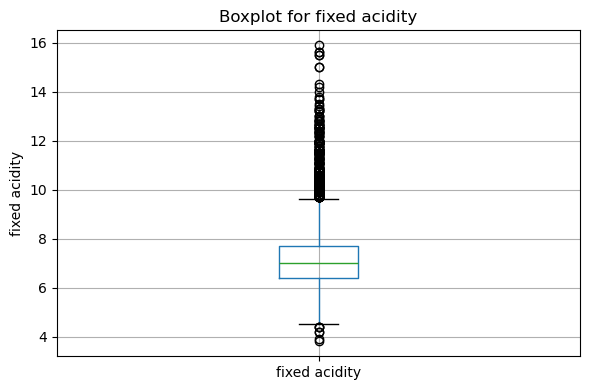

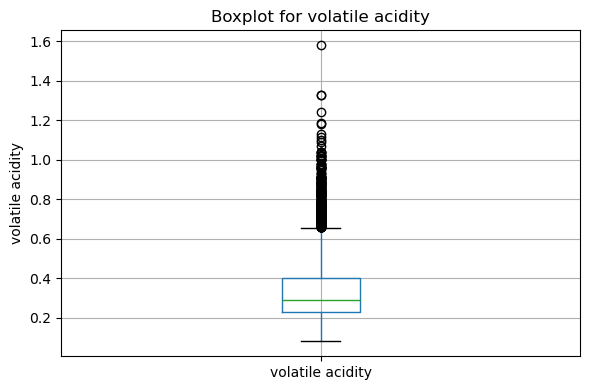

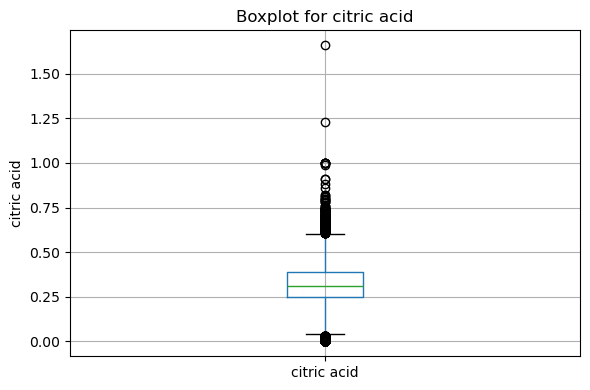

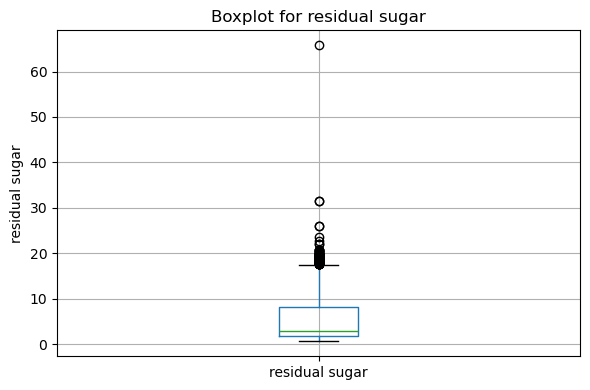

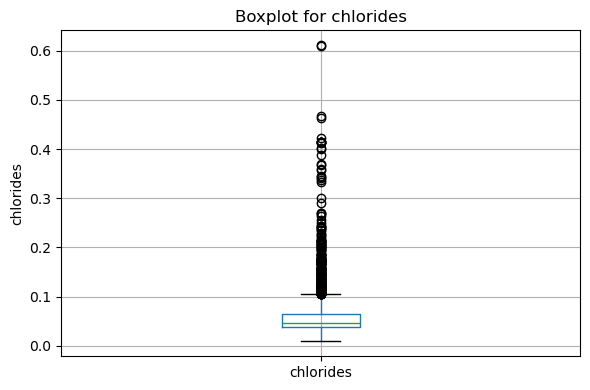

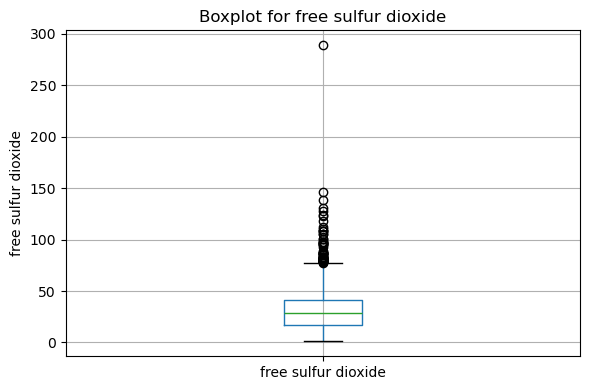

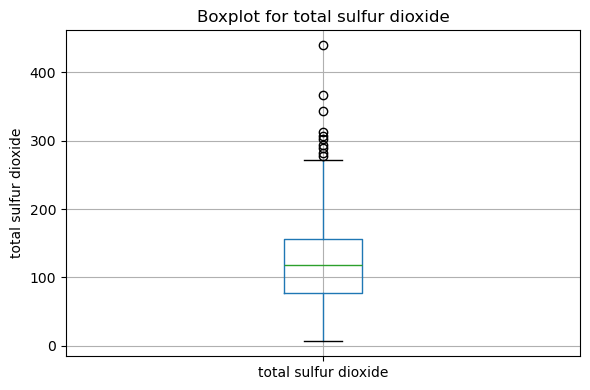

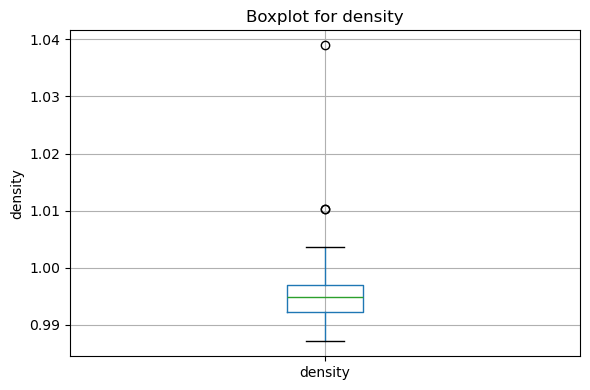

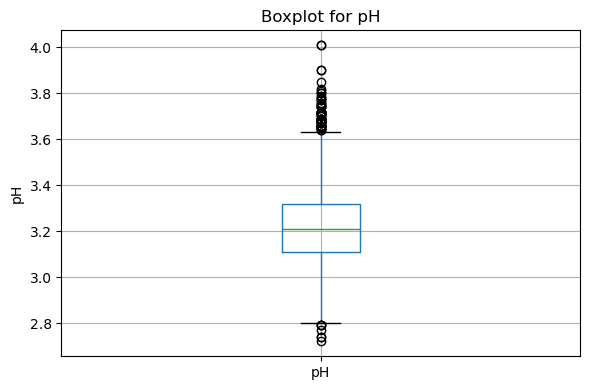

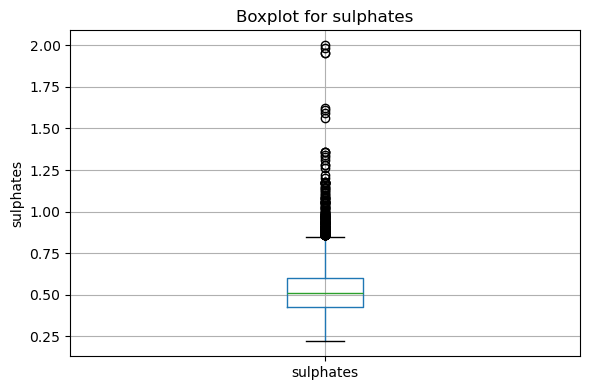

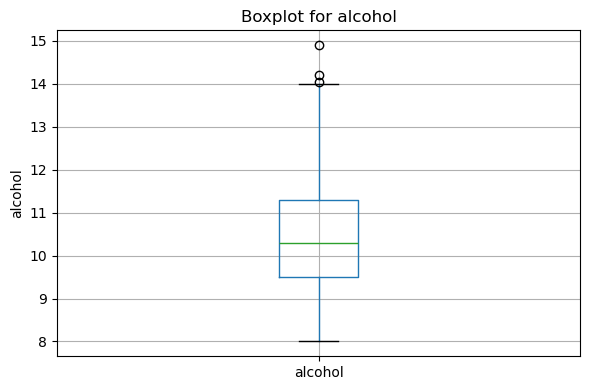

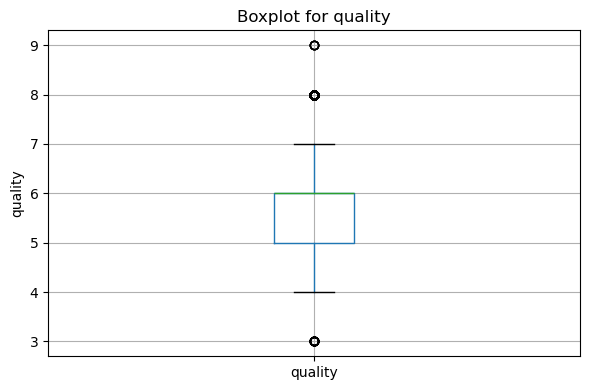

In [33]:
for column in wine_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    wine_df.boxplot(column=column)
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

In [35]:
max_rows = no_duplicates_df.loc[no_duplicates_df.idxmax()]
display(max_rows)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
565,15.9,0.360,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,red
1106,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3,red
1987,7.4,0.200,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,white
3653,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white
226,7.7,0.410,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,5,red
5186,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
5186,6.1,0.260,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
3653,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,white
1121,5.4,0.740,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red
135,9.2,0.520,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4,red


We can see that the wine with the highest fixed acidity is also the wine with the highest alcohol. It might be interesting to find out if there is a correlation between these two columns.
We also see that the wine with highest residual sugar is also the wine with the higest density. This makes sense from a Physics explanation. We expect these two colimns to be correlated.
We also see free sulfur and total sulfur dioxide might be correlated.

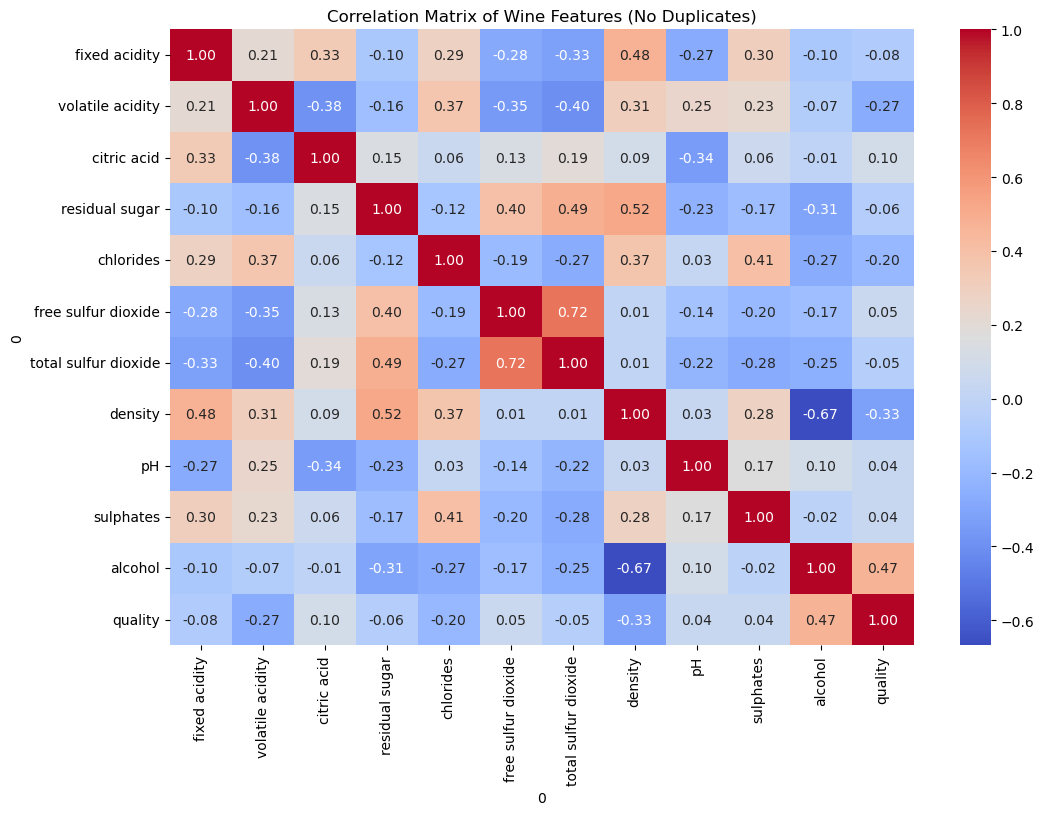

In [42]:
import seaborn as sns

# Compute the correlation matrix for numeric columns
corr = no_duplicates_df.select_dtypes(include='number').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features (No Duplicates)')
plt.show()